# PROBLEM 2: Larger Unlabeled subset

## Part 1: Visualization

In [1]:
import numpy as np
x_path = "release_gene_analysis_data\data\p2_unsupervised\X.npy"
X = np.load(x_path)
X.shape

(2169, 45768)

In [2]:
Xlog = np.log2(X+1)
Xlog.shape

(2169, 45768)

#### Question (1):
Provide at least one visualization which clearly shows the existence of the three main brain cell types described by the scientist, and explain how it shows this. Your visualization should support the idea that cells from a different group (for example, excitatory vs inhibitory) can differ greatly.

In [3]:
from sklearn.decomposition import PCA
pca = PCA()
Xlogtr = pca.fit_transform(Xlog)
Xlogtr.shape

(2169, 2169)

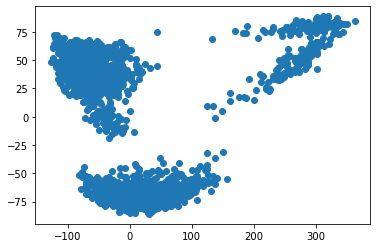

In [5]:
import matplotlib.pyplot as plt
plt.scatter(Xlogtr[:, 0], Xlogtr[:, 1])

The graph clearly shows the existance of three distinct clusters. I predict that each cluster of these belongs to one of the cell groups. 
We can see a group at the upper left corner, one at the bottom and another one at upper right corner

#### Question (2):
Provide at least one visualization which supports the claim that within each of the three types, there are numerous possible sub-types for a cell. In your visualization, highlight which of the three main types these sub-types belong to. Again, explain how your visualization supports the claim.

In [7]:
from sklearn.manifold import MDS
mds = MDS()
Xmds_tr = mds.fit_transform(Xlog)
Xmds_tr.shape

(2169, 2)

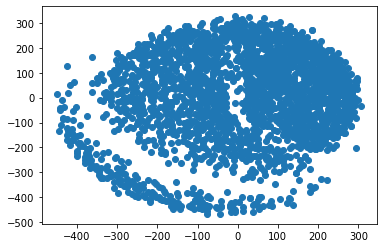

In [8]:
plt.scatter(Xmds_tr[:, 0], Xmds_tr[:, 1])

We can see that the MDS plot doesn't give a good visualization of the subtype clusters or even the type clusters themselves. We will try to use MDS transform over the PCA tranformed data and check the visualization

In [9]:
from sklearn.manifold import MDS
mds = MDS()
Xmds_tr = mds.fit_transform(Xlogtr)
Xmds_tr.shape

C:\Users\Shourbagy\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


(2169, 2)

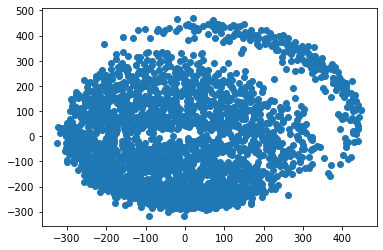

In [10]:
plt.scatter(Xmds_tr[:, 0], Xmds_tr[:, 1])

It's shown that applying PCA before MDS doesn't really do anything. Thus, we should resort to T-SNE. I will use preplexity of 40

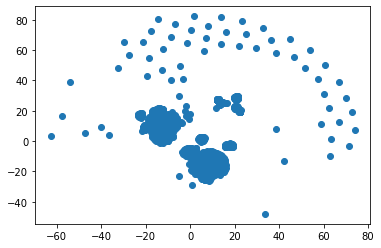

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity =40)
Xtsne_tr = tsne.fit_transform(Xlog)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

We can see a lot of clusters in the middle part. We can identify there three main clusters of clusters. There are three clusters within the one at the upper left part, four at the bottom left part, three at the upper right part.

There are also some scattered points at the edges which seems from this graph don't belog to any of the clusters. This makes no sense, as all of the points should belong to one of the clusters. They can be considered outliers, but they are large in numbers. To clear out this, I will try to plot different T-SNE plots with different perplexities: 40, 60, 20, 75 and see whether the subtypes appear or not. 

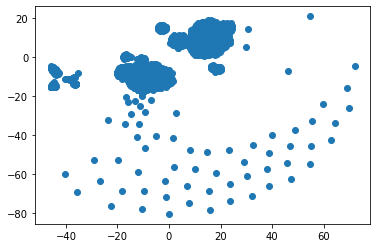

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity =40)
Xtsne_tr = tsne.fit_transform(Xlog)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

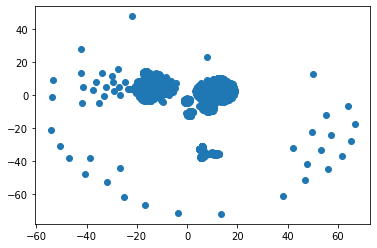

In [19]:
tsne = TSNE(perplexity =60)
Xtsne_tr = tsne.fit_transform(Xlog)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

In the above graph, we can see that the number of scattered points at the edges decreases in number while the number of clusters within each of the obvious three clusters are quite the same as before

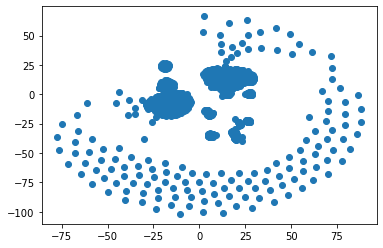

In [20]:
tsne = TSNE(perplexity =20)
Xtsne_tr = tsne.fit_transform(Xlog)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

We can see that when we decrease the perplexity, the more scatter points we have and the more the original clusters separated. We can see no the large separation between the subclusters.

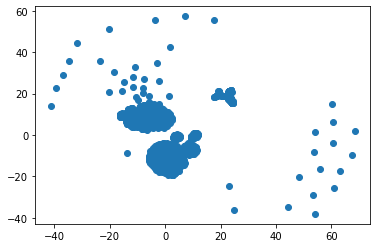

In [21]:
tsne = TSNE(perplexity =75)
Xtsne_tr = tsne.fit_transform(Xlog)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

As we chose a larger perplexity, the number of scattered points decreases. However, the subclusters begin to collide with each other. Despite so, we can see the four subclusters we talked about before in the bottom big clusters. We can barely see the three subclusters we talked about in the upper left one. We cannot see the three we talked about in the upper right

# Part 2: Unsupervised Feature Selection

Here, I will first try to choose 

#### Question (1):
Using your clustering method(s) of choice, find a suitable clustering for the cells. Support your choice of clustering with appropriate visualizations and/or numerical findings. Be sure to briefly explain how you chose the number of clusters.

I will use the transformed data instead of the original data as it provides well represented data in the visualization

In [15]:
WGSS = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans = kmeans.fit(Xlog)
    WGSS.append(kmeans.inertia_)

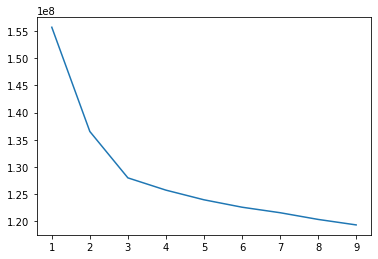

In [14]:
plt.plot(range(1, 10), WGSS)

Now, we can see that two or three are the best number of clusters. This is based on the elbow technique. In the graph, we can see that there is a drop in the slope at these points which indicates that the WGSS is decreasing less after those points. For conveinence and to be consistant with the description of the problem, I will choose 3

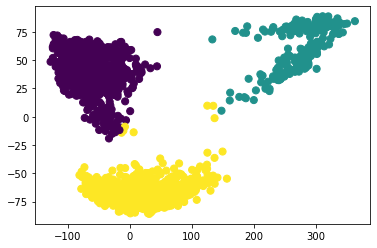

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(Xlogtr)
clustered = kmeans.predict(Xlogtr)
plt.scatter(Xlogtr[:, 0], Xlogtr[:, 1], c=clustered, s=50, cmap='viridis')

The graph clearly shows the three different clusters

#### Question (2):
We will now treat your cluster assignments as labels for supervised learning. Fit a logistic regression model to the original data (not principal components), with your clustering as the target labels. Since the data is high-dimensional, make sure to regularize your model using your choice of ℓ1, ℓ2, or elastic net, and separate the data into training and validation or use cross-validation to select your model. Report your choice of regularization parameter and validation performance

For this question, I will use the p2_unsupervised_reduced dataset as it takes less that than the unreduced one.

In [1]:
#we will use the reduced dataset as it takes less time
import numpy as np
x_path = "release_gene_analysis_data\data\p2_unsupervised_reduced\X.npy"
Xred = np.load(x_path)
Xred.shape

(2169, 20000)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(Xred)
clustered = kmeans.predict(Xred)

"clustered" variable contains the cluster assignments of all the points in our dataset. We can use this as the labels of the points to be used later for logistic regression. 

In [10]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_val, yr_train, yr_val = train_test_split(Xred, clustered, test_size=0.2, random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(penalty='l2', random_state=0, multi_class='multinomial')
lr_model.fit(Xr_train, yr_train)
predicted = lr_model.predict(Xr_val)
accuracy = accuracy_score(yr_val, predicted)
print('Accuracy: ', accuracy)

Accuracy:  0.9976958525345622


The Accuracy is 99.769 % which is prety high. I choose the L2 regularization for my model

#### Question (3):
Select the features with the top 100 corresponding coefficient values (since this is a multi-class model, you can rank the coefficients using the maximum absolute value over classes, or the sum of absolute values). Take the evaluation training data and use a subset of the genes consisting of the features you selected. Train a logistic regression classifier on this training data, and evaluate its performance on the evaluation test data. Report your score.

Compare with two baselines: random features (take a random selection of 100 genes), and high-variance features (take the 100 genes with highest variance). Compare the variances of the features you selected with the highest variance features by plotting a histogram of the variances of features selected by both methods.

Note (March 27): : The histogram should show the distribution of the variances of features selected by both methods. You could show the comparison by overlaying both histograms in the same plot.

Hint (March 27): Refer to the recitation for some guidance if necessary.

First, we will print the coefficients of the logistic regression model

In [14]:
coef = lr_model.coef_   #this will give us the following shape (n_classes, n_features)
coef

array([[-1.17130290e-05,  3.28771372e-09, -5.38547160e-07, ...,
        -2.01111125e-05,  2.75303370e-05,  2.66811984e-05],
       [ 1.57963352e-06, -2.98609255e-10, -7.82529440e-08, ...,
        -5.02519425e-06, -6.59739978e-06, -1.00711681e-06],
       [ 1.01333946e-05, -2.98915663e-09,  6.16800077e-07, ...,
         2.51362940e-05, -2.09329523e-05, -2.56741183e-05]])

In [15]:
coef.shape

(3, 20000)

We can see the coef variable is a 2D array. This is because it's a multinomial model. 3 corresponds to the number of classes. For each one, we have 20000 variables. Each one of these variables corresponds to one feature in the Dataset. 

In [23]:
coef_rank = np.sum(np.abs(coef), axis=0)

In [29]:
#get th indices of the vairables with max rank
cfrk_cols = np.argpartition(coef_rank, -100)[-100:]

In [30]:
#constructing the dataset with these features
cfrk = Xred[:, cfrk_cols]
cfrk.shape

(2169, 100)

##### Constructing the baseline models

Constructing the first baseline model: random feature selection

In [31]:
import numpy as np
n_features = Xred.shape[1]
rand_f = np.random.randint(0, n_features, size=100)

In [32]:
Xrand = Xred[:, rand_f]

In [33]:
Xrand.shape

(2169, 100)

Constructing the second baseline model: maxmimum variance feature selection

In [35]:
#viewing the variance vector
Xred.var(axis=1)

array([ 49313.13998785,  29030.97547338,  53977.68126659, ...,
       207274.31518612, 146038.29298266, 168283.06767725])

In [37]:
#the following lines of code are meant to extract the columns with max variance
maxvar_cols = np.argpartition(Xred.var(axis=1), -100)[-100:]
Xmxvar = Xred[:, maxvar_cols]
Xmxvar.shape

(2169, 100)

Comparing the two baseline models: by comparing the variance of the features selected in the two models

In [48]:
import matplotlib.pyplot as plt

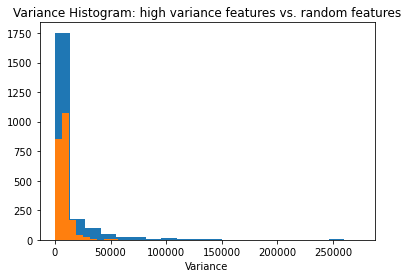

In [60]:
Xmxvar_var = Xmxvar.var(axis=1)
Xrand_var = Xrand.var(axis=1)
plt.hist(Xmxvar_var, bins=20)
plt.hist(Xrand_var, bins=20)
plt.xlabel('Variance')
plt.title('Variance Histogram: high variance features vs. random features')
plt.show()

Note: the blue histogram is the historgram of the high variance feature dataset's vairances while the orange diagram is for the random feature dataset. 

We can clearly see that the high variance feature model has higher variances than the random feature model. The tails of the high vairnace model extends to higher values of vairance.

In [47]:
Xmxvar.shape

(2169, 100)

##### Testing the three models

In [87]:
#reading the evaluation dataset
path = "release_gene_analysis_data\data\p2_evaluation_reduced\X_train.npy"
X_train = np.load(path)
X_train = np.log2(X_train+1)
path = "release_gene_analysis_data\data\p2_evaluation_reduced\y_train.npy"
y_train = np.load(path)
path = "release_gene_analysis_data\data\p2_evaluation_reduced\X_test.npy"
X_test = np.load(path)
X_test = np.log2(X_test+1)
path = "release_gene_analysis_data\data\p2_evaluation_reduced\y_test.npy"
y_test = np.load(path)

In [88]:
#preparing the training and testing data for the models

#My model
Xm_train = X_train[:, cfrk_cols]
ym_train = y_train
Xm_test = X_test[:, cfrk_cols]
ym_test = y_test

#The random features model
Xr_train = X_train[:, rand_f]
yr_train = y_train
Xr_test = X_test[:, rand_f]
yr_test = y_test

#The maximum variance feature model
Xv_train = X_train[:, maxvar_cols]
yv_train = y_train
Xv_test = X_test[:, maxvar_cols]
yv_test = y_test

###### Testing The random feature selection model (Logistic regression fitting)

In [91]:
lr_model = LogisticRegression(penalty='l2', random_state=0, multi_class='multinomial')
lr_model.fit(Xr_train, yr_train)

C:\Users\Shourbagy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

In [93]:
predicted = lr_model.predict(Xr_test)
accuracy = accuracy_score(yr_test, predicted)
print("Random Feature Selection Model Accuracy: ", accuracy)

Random Feature Selection Model Accuracy:  0.5649819494584838


We can see that the accuracy is not good

###### Testing the maximum variance feature selection (logistic regression fitting)

In [97]:
lr_model.fit(Xv_train, yv_train)
predicted = lr_model.predict(Xv_test)
accuracy = accuracy_score(yv_test, predicted)
print("Maximum Variance Feature Selection Model Accuracy: ", accuracy)

Maximum Variance Feature Selection Model Accuracy:  0.463898916967509


C:\Users\Shourbagy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### Testing my model feature selection using clustering (logistic regression fitting)

In [98]:
lr_model.fit(Xm_train, ym_train)
predicted = lr_model.predict(Xm_test)
accuracy = accuracy_score(ym_test, predicted)
print("Maximum Variance Feature Selection Model Accuracy: ", accuracy)

Maximum Variance Feature Selection Model Accuracy:  0.8158844765342961


C:\Users\Shourbagy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### Conclusion:
We can see that my model yeilds the highest accuracy result. It gives 81 % accuracy while the two baseline models give results that is in the range of 40-50 percent

# PROBLEM 3: Influence of Hyper-parameters 

The hyper-parameter choices used in data analysis techniques can have a large impact on the inferences made. As you may have encountered, finding the best choice of parameter such as perplexity in T-SNE or the number of clusters can be an ambiguous problem. We will now investigate the sensitivity of your results to changes in these hyper-parameters, with the goal of understanding how your conclusions may vary depending on these choices.

#### Question (1):
When we created the T-SNE plot in Problem 1, we ran T-SNE on the top 50 PC's of the data. But we could have easily chosen a different number of PC's to represent the data. Run T-SNE using 10, 50, 100, 250, and 500 PC's, and plot the resulting visualization for each. What do you observe as you increase the number of PC's used?

In [45]:
Xlogtr.shape

(2169, 2169)

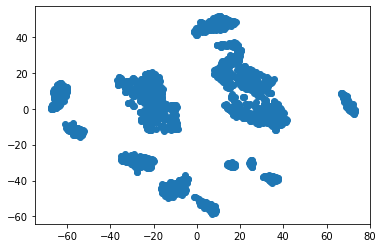

In [46]:
tsne = TSNE(perplexity =40)
X_t = Xlogtr[:, 0:10]
Xtsne_tr = tsne.fit_transform(X_t)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

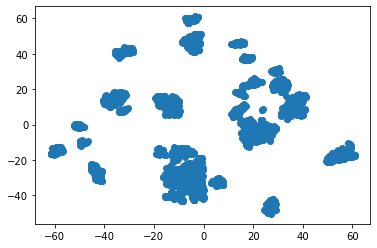

In [47]:
X_t = Xlogtr[:, 0:50]
Xtsne_tr = tsne.fit_transform(X_t)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

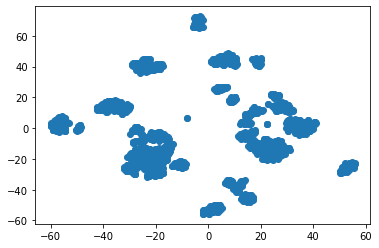

In [48]:
X_t = Xlogtr[:, 0:100]
Xtsne_tr = tsne.fit_transform(X_t)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

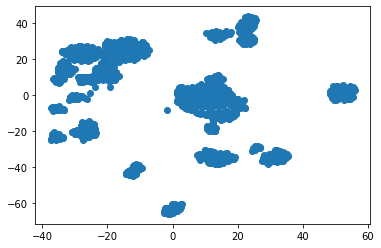

In [49]:
X_t = Xlogtr[:, 0:250]
Xtsne_tr = tsne.fit_transform(X_t)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

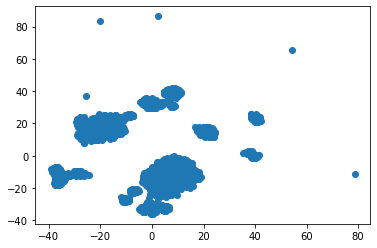

In [50]:
X_t = Xlogtr[:, 0:500]
Xtsne_tr = tsne.fit_transform(X_t)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

Obseration: When I increase the number of PCs, the graph becomes more clustered. When we take less number of PCs, there are more uncertainty that's way the points become separated more. When we increase the number of PCs, the uncertainity becomes less which makes us sure of the clusterings of different points and which cluster they belong. 

#### Question (2)
Pick three hyper-parameters below and analyze how changing the hyper-parameters affect the conclusions that can be drawn from the data. Please choose at least one hyper-parameter from each of the two categories (visualization and clustering/feature selection). At minimum, evaluate the hyper-parameters individually, but you may also evaluate how joint changes in the hyper-parameters affect the results. You may use any of the datasets we have given you in this project. For visualization hyper-parameters, you may find it productive to augment your analysis with experiments on synthetic data, though we request that you use real data in at least one demonstration.

###### First Hyper-parameter is changing learning_rate of TSNE. 
I will try different values of learning-rate. I will used the projected data with 250 directions to speed up computation. 

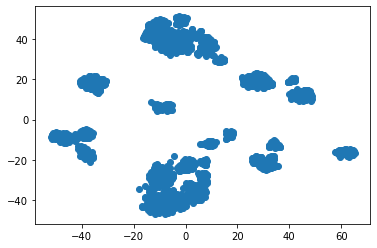

In [51]:
tsne = TSNE(perplexity =40, learning_rate=400)
X_t = Xlogtr[:, 0:250]
Xtsne_tr = tsne.fit_transform(X_t)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

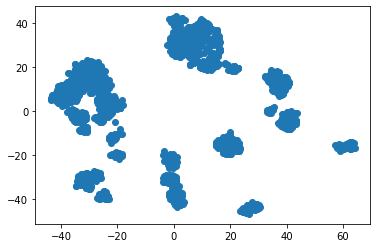

In [52]:
tsne = TSNE(perplexity =40, learning_rate=200)
X_t = Xlogtr[:, 0:250]
Xtsne_tr = tsne.fit_transform(X_t)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

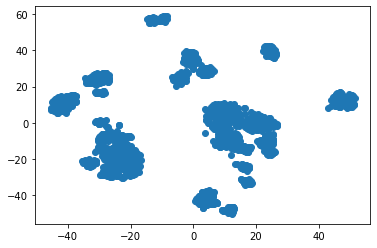

In [53]:
tsne = TSNE(perplexity =40, learning_rate=100)
X_t = Xlogtr[:, 0:250]
Xtsne_tr = tsne.fit_transform(X_t)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

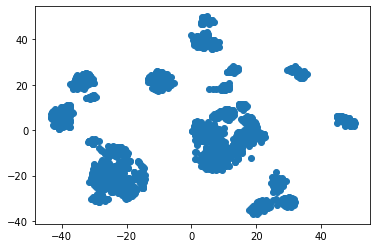

In [54]:
tsne = TSNE(perplexity =40, learning_rate=50)
X_t = Xlogtr[:, 0:250]
Xtsne_tr = tsne.fit_transform(X_t)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

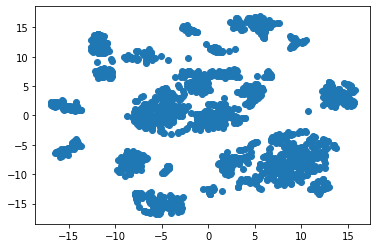

In [55]:
tsne = TSNE(perplexity =40, learning_rate=1)
X_t = Xlogtr[:, 0:250]
Xtsne_tr = tsne.fit_transform(X_t)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

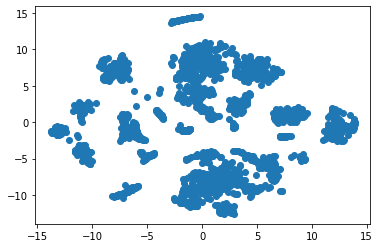

In [56]:
tsne = TSNE(perplexity =40, learning_rate=0.5)
X_t = Xlogtr[:, 0:250]
Xtsne_tr = tsne.fit_transform(X_t)
plt.scatter(Xtsne_tr[:, 0], Xtsne_tr[:, 1])

Lower learning rates makes the data more separated while higher learning rates makes the data more bulking in the visulalization

###### Second hyperparameter is the Effect of PCs choosen on clustering

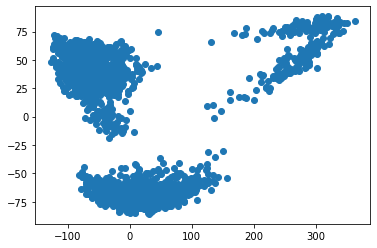

In [58]:
#we will do PCA to transform the data
Xredlog = np.log2(Xred+1)
pca = PCA()
Xredlogtr = pca.fit_transform(Xredlog)
plt.scatter(Xredlogtr[:, 0], Xredlogtr[:, 1])

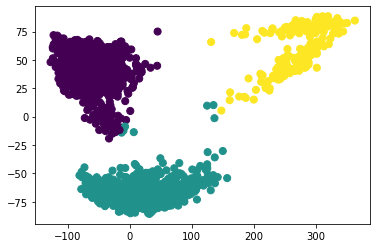

In [63]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(Xredlogtr[:, 0:10])
clustered = kmeans.predict(Xredlogtr[:, 0:10])
plt.scatter(Xredlogtr[:, 0], Xredlogtr[:, 1], c=clustered, s=50, cmap='viridis')

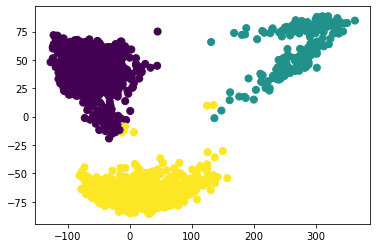

In [64]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(Xredlogtr[:, 0:25])
clustered = kmeans.predict(Xredlogtr[:, 0:25])
plt.scatter(Xredlogtr[:, 0], Xredlogtr[:, 1], c=clustered, s=50, cmap='viridis')

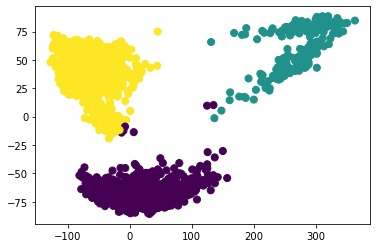

In [65]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(Xredlogtr[:, 0:50])
clustered = kmeans.predict(Xredlogtr[:, 0:50])
plt.scatter(Xredlogtr[:, 0], Xredlogtr[:, 1], c=clustered, s=50, cmap='viridis')

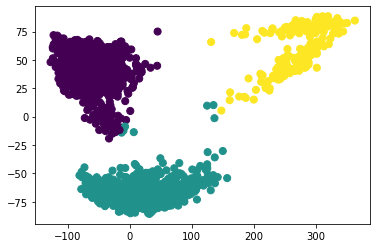

In [66]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(Xredlogtr[:, 0:100])
clustered = kmeans.predict(Xredlogtr[:, 0:100])
plt.scatter(Xredlogtr[:, 0], Xredlogtr[:, 1], c=clustered, s=50, cmap='viridis')

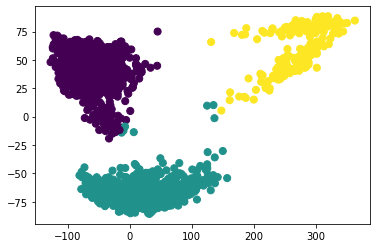

In [67]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(Xredlogtr[:, 0:5])
clustered = kmeans.predict(Xredlogtr[:, 0:5])
plt.scatter(Xredlogtr[:, 0], Xredlogtr[:, 1], c=clustered, s=50, cmap='viridis')

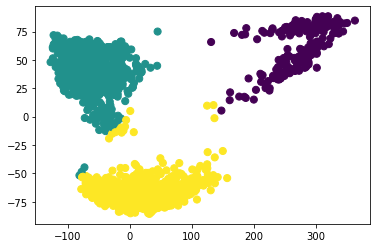

In [68]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(Xredlogtr[:, 0:2])
clustered = kmeans.predict(Xredlogtr[:, 0:2])
plt.scatter(Xredlogtr[:, 0], Xredlogtr[:, 1], c=clustered, s=50, cmap='viridis')

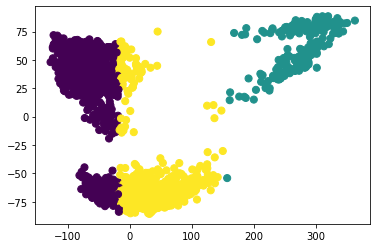

In [69]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans = kmeans.fit(Xredlogtr[:, 0:1])
clustered = kmeans.predict(Xredlogtr[:, 0:1])
plt.scatter(Xredlogtr[:, 0], Xredlogtr[:, 1], c=clustered, s=50, cmap='viridis')

We can see that decrasing the number of PCs decrease the accuracy of detecting the clusters. This is so obvious in the 1PC choosen case. That's because we have only on axis to choose upon the number of clusters. For example, in the above graph, we have only the x axis. That's why the algorithm separats the clusters using veritial boundries

###### Third Hyper-parameter is the type of regularization (L1, L2, elastic net)

In [99]:
Xred_train, Xred_val, yred_train, yred_val = train_test_split(Xred, clustered, test_size=0.2, random_state=0)

###### First, 
we will try the L2 regularization

In [100]:
lr_model = LogisticRegression(penalty='l2', random_state=0, multi_class='multinomial')
lr_model.fit(Xred_train, yred_train)
predicted = lr_model.predict(Xred_val)
accuracy = accuracy_score(yred_val, predicted)
print('Accuracy: ', accuracy)

Accuracy:  0.9976958525345622


In [102]:
coef = lr_model.coef_   #this will give us the following shape (n_classes, n_features)
coef_rank = np.sum(np.abs(coef), axis=0)
cfrk_cols = np.argpartition(coef_rank, -100)[-100:]
L2_selected = Xred[:, cfrk_cols]

###### Second, 
we will try the L1 regularization

In [107]:
lr_model = LogisticRegression(penalty='l1', C=1, solver='saga', random_state=0, multi_class='multinomial')
lr_model.fit(Xred_train, yred_train)
predicted = lr_model.predict(Xred_val)
accuracy = accuracy_score(yred_val, predicted)
print('Accuracy: ', accuracy)

Accuracy:  0.9976958525345622


C:\Users\Shourbagy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [108]:
coef = lr_model.coef_   #this will give us the following shape (n_classes, n_features)
coef_rank = np.sum(np.abs(coef), axis=0)
cfrk_cols = np.argpartition(coef_rank, -100)[-100:]
L1_selected = Xred[:, cfrk_cols]

###### Third, 
We will try the elasticnet regularization

In [110]:
lr_model = LogisticRegression(penalty='elasticnet', l1_ratio = 0.5, C=1, solver='saga', random_state=0, multi_class='multinomial')
lr_model.fit(Xred_train, yred_train)
predicted = lr_model.predict(Xred_val)
accuracy = accuracy_score(yred_val, predicted)
print('Accuracy: ', accuracy)

Accuracy:  0.9976958525345622


C:\Users\Shourbagy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [111]:
coef = lr_model.coef_   #this will give us the following shape (n_classes, n_features)
coef_rank = np.sum(np.abs(coef), axis=0)
cfrk_cols = np.argpartition(coef_rank, -100)[-100:]
elasticnet_selected = Xred[:, cfrk_cols]

###### Comparision

In [115]:
#L1
X1_train, X1_val, y1_train, y1_val = train_test_split(L1_selected, clustered, test_size=0.2, random_state=0)
#L2
X2_train, X2_val, y2_train, y2_val = train_test_split(L2_selected, clustered, test_size=0.2, random_state=0)
#Elastic Net
Xe_train, Xe_val, ye_train, ye_val = train_test_split(elasticnet_selected, clustered, test_size=0.2, random_state=0)

In [121]:
#L1
lr_model = LogisticRegression(penalty='l2', random_state=0, multi_class='multinomial', max_iter = 200)
lr_model.fit(X1_train, y1_train)
predicted = lr_model.predict(X1_val)
accuracy = accuracy_score(y1_val, predicted)
print("L1 Model Accuracy: ", accuracy)
#L2
lr_model = LogisticRegression(penalty='l1', C=1, solver='saga', random_state=0, multi_class='multinomial', max_iter = 500)
lr_model.fit(X2_train, y2_train)
predicted = lr_model.predict(X2_val)
accuracy = accuracy_score(y2_val, predicted)
print("L2 Model Accuracy: ", accuracy)
#ELastic net
lr_model = LogisticRegression(penalty='elasticnet', l1_ratio = 0.5, C=1, solver='saga', random_state=0, multi_class='multinomial', max_iter = 500)
lr_model.fit(Xe_train, ye_train)
predicted = lr_model.predict(Xe_val)
accuracy = accuracy_score(ye_val, predicted)
print("ElasticNet Model Accuracy: ", accuracy)

L1 Model Accuracy:  0.9930875576036866


C:\Users\Shourbagy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


L2 Model Accuracy:  0.9976958525345622
ElasticNet Model Accuracy:  0.9976958525345622


C:\Users\Shourbagy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


The accuracies of the L2 and the elastic net are quite high comparied to the L1.